In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [2]:
music


,duration,loudness,bpm
0,184,18,105
1,134,34,90
2,243,43,78
3,186,36,75
4,122,22,120
5,197,9,110
6,294,29,80
7,382,22,100
8,102,10,105
9,264,24,60


In [3]:
len(np.arange(0,3,0.1)[:,np.newaxis])

30

In [11]:
from sklearn import neighbors

from sklearn.model_selection import train_test_split

train , test = train_test_split(music, test_size = 0.3)

x_train = train.drop('bpm', axis=1)
y_train = train['bpm']

x_test = test.drop('bpm', axis = 1)
y_test = test['bpm']



In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [13]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 15.326085243430198
RMSE value for k=  2 is: 14.648663192705788
RMSE value for k=  3 is: 14.832396974191324
RMSE value for k=  4 is: 14.382667037483387
RMSE value for k=  5 is: 16.30773504267905
RMSE value for k=  6 is: 14.671400751121208
RMSE value for k=  7 is: 14.328744717178406
RMSE value for k=  8 is: 14.744761310754106
RMSE value for k=  9 is: 15.45753952350481
RMSE value for k=  10 is: 15.239495471380353
RMSE value for k=  11 is: 14.95548951611637
RMSE value for k=  12 is: 15.168498057926941
RMSE value for k=  13 is: 15.072714396008518
RMSE value for k=  14 is: 15.694197116426556
RMSE value for k=  15 is: 15.678891999149291
RMSE value for k=  16 is: 15.827274059883674
RMSE value for k=  17 is: 15.898116118486433
RMSE value for k=  18 is: 16.117187019487144
RMSE value for k=  19 is: 16.518426619226222
RMSE value for k=  20 is: 17.011442227708578


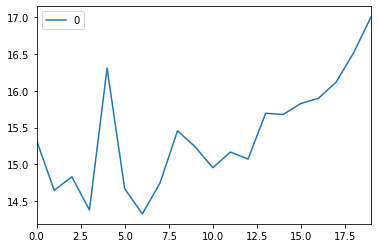

In [15]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [32]:
#reading test and submission files
test_X = [(random.uniform(0, 2), random.uniform(0, 4)) for i in range(30)]
predict = np.arange(0, 50, 0.1)[:, np.newaxis]

#preprocessing test dataset


test_scaled = scaler.fit_transform(test_X)


#predicting on the test set and creating submission file
predict = model.predict(test_scaled)

error = sqrt(mean_squared_error(y_test,pred))

print(error)

17.011442227708578


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

In [ ]:
# below is mimic course content, but it doesn't work

In [ ]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')
X1 = pd.DataFrame(music.loudness)
X2 = pd.DataFrame(music.duration)
features=list(zip(music.loudness, music.duration))
print(Y)
Y = music.bpm
model1=knn.fit(features, Y)


# Set up our prediction line.
import random
from random import randint

T = [(random.uniform(0, 2), random.uniform(0, 4)) for i in range(30)]

# Trailing underscores are a common convention for a prediction.
Y_ = model1.predict(T)
print(Y_)




plt.scatter(features,Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))